In [1]:
import numpy as np
import ot #package for optimal transport solver
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d #to plot in 3D
from helper import *

In [2]:
def to_one(i,j,n): #converting 2d coordinates to 1d coordinates
    return i*n+j

In [3]:
def to_two(x,n): #converting 1d coordinates to 2d coordinates
    return(int((x-x%n)/n), x%n)

In [4]:
def grid_coord(X_coord, Y_coord, j,n):
    x_grid=X_coord[to_two(j,n)[0]][to_two(j,n)[1]]
    y_grid=Y_coord[to_two(j,n)[0]][to_two(j,n)[1]]
    grid_coord=np.array([x_grid, y_grid])
    return grid_coord

In [5]:
n=10 #20 is good, doesn't take long to run and nice result
seed=981

np.random.seed(seed) #setting seed for reproducibility
X=np.random.uniform(size=(n**2,2)) 

x = np.linspace(1,n,n)/(n+1)
y = np.linspace(1,n,n)/(n+1)

X_coord, Y_coord = np.meshgrid(x, y) #describes a grid where (X_coord[i][j], Y_coord[i][j]) described the meshed points 

X_grid=np.array([[X_coord[i][j], Y_coord[i][j]] for j in range(n) for i in range(n)])
#a grid of the shape  [ (0,0), (0,1), ..., (0,n-1), ... , (n-1,0),...,(n-1,n-1)   ]

C=np.zeros((n**2,n**2))#cost matrix, C_ij is the distance between X_i and Y_j, of size n**2 times n**2

for i in range(n**2):
    for j in range(n**2):
        C[i,j]=np.linalg.norm(X[i]-X_grid[j])**2
        
a=np.ones(n**2)/n**2 #re-chech if indeed dividing by n**2
b=np.ones(n**2)/n**2
P_test=ot.emd(a, b, C, numItermax=100000, log=False, center_dual=True, numThreads=1, check_marginals=True)

In [6]:
# defining the interpolating function
#defining f such that f is one dimensional

f_1=np.zeros(n**2) #didn't constraint f_1[0] and f_1[-1] to be zeros as in the plot of f_1 as 1-dim, it makes no sense

sigma=np.zeros(n**2)
X_p=np.zeros((n**2,2))

for i in range(n**2):
    index=np.argwhere(P_test[i,:]>0)
    
    X_p[index[0,0]]=X[i]


for i in range(0,n**2):
        f_1[i]=np.linalg.norm(X_grid[i]-X_p[i]) #the norm??

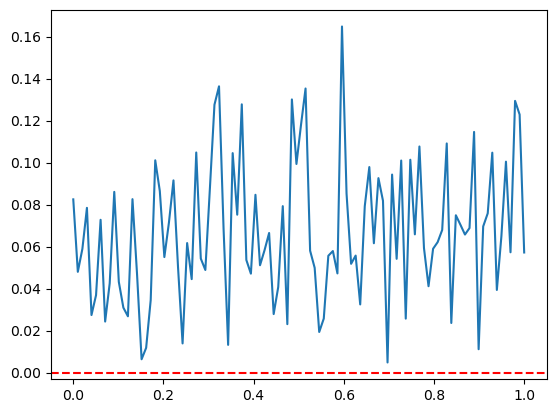

In [7]:
z=np.linspace(0,1,n**2)
plt.plot(z, f_1)
plt.axhline(y=0, color='r', linestyle='--', label="y=0")
plt.show()

In [8]:
# defining the interpolating function
#defining f such that f is two dimensional

In [9]:
f_2=np.zeros((n,n))  #f_2 is defined on the interior of the unit square, see if padding should be added

sigma=np.zeros(n**2)
X_p=np.zeros((n**2,2))

for i in range(n**2):
    index=np.argwhere(P_test[i,:]>0)
    
    X_p[index[0,0]]=X[i]


for i in range(0,n**2):
    x_f,y_f=to_two(i,n)
    f_2[x_f][y_f]=np.linalg.norm(X_grid[i]-X_p[i]) #the norm??

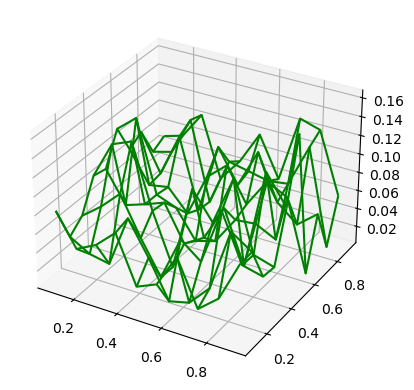

In [10]:
#f=lambda x,y: #defining a function for the z-axis

fig = plt.figure()
 
# syntax for 3-D projection
ax = plt.axes(projection ='3d')

# x and y axis
X_axis=X_coord
Y_axis=Y_coord

Z_axis=f_2

ax.plot_wireframe(X_axis, Y_axis, Z_axis, color ='green')

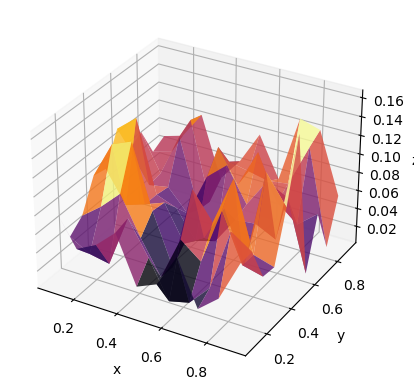

In [25]:
fig = plt.figure()
 
# syntax for 3-D projection
ax = plt.axes(projection ='3d')

# x and y axis
X_axis=X_coord
Y_axis=Y_coord

Z_axis=f_2
 
ax.plot_surface(X_axis, Y_axis, Z_axis, cmap='inferno', alpha=0.8)
 
ax.set_xlabel('x', fontsize=10)
ax.set_ylabel('y', fontsize=10)
ax.set_zlabel('z', fontsize=10)
 
plt.show()